In [19]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
from bbknn import bbknn
import scanorama as scnrma
import pandas as pd
from harmony import harmonize
from sklearn.metrics.cluster import adjusted_rand_score
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.utils import shuffle
from anndata import AnnData
from sklearn.cluster import KMeans
from typing import Union, Optional, Tuple, Collection, Sequence, Iterable
from scipy.stats import hypergeom
import sklearn.preprocessing
import seaborn as sn


sc.settings.verbosity = 0           # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.logging.print_memory_usage()
sc.set_figure_params(dpi=100, dpi_save=200)

scanpy==1.6.0 anndata==0.7.4 umap==0.3.10 numpy==1.17.2 scipy==1.5.2 pandas==1.1.0 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1 leidenalg==0.7.0
Memory usage: current 0.06 GB, difference -0.34 GB


In [20]:

adata = sc.read_h5ad(path + 'gluta_gaba_glia_3000_combined.h5ad')

# Cluster and correct by age

In [26]:
adata.X = adata.raw.X

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

sc.pp.scale(adata, max_value=10) #scale
sc.tl.pca(adata, svd_solver='arpack') #run PCA

Z = harmonize(adata.obsm['X_pca'], adata.obs, batch_key = 'Age')
adata.obsm['X_harmony'] = Z

sc.pp.neighbors(adata, n_neighbors=25, use_rep='X_harmony')

#sc.tl.leiden(adata)
sc.tl.umap(adata)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


	Initialization is completed.
	Completed 1 / 10 iteration(s).
	Completed 2 / 10 iteration(s).
	Completed 3 / 10 iteration(s).
	Completed 4 / 10 iteration(s).
	Completed 5 / 10 iteration(s).
	Completed 6 / 10 iteration(s).
	Completed 7 / 10 iteration(s).
	Completed 8 / 10 iteration(s).
	Completed 9 / 10 iteration(s).
	Completed 10 / 10 iteration(s).
Reach convergence after 10 iteration(s).


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../opt/anac

In [84]:
adata.X = adata.raw.X

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

sc.pp.scale(adata, max_value=10) #scale
sc.tl.pca(adata, svd_solver='arpack') #run PCA

#Z = harmonize(adata.obsm['X_pca'], adata.obs, batch_key = 'Age')
#adata.obsm['X_harmony'] = Z

sc.pp.neighbors(adata, n_neighbors=25,)

#sc.tl.leiden(adata)
sc.tl.umap(adata)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  self.func_ir.loc))
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' 

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


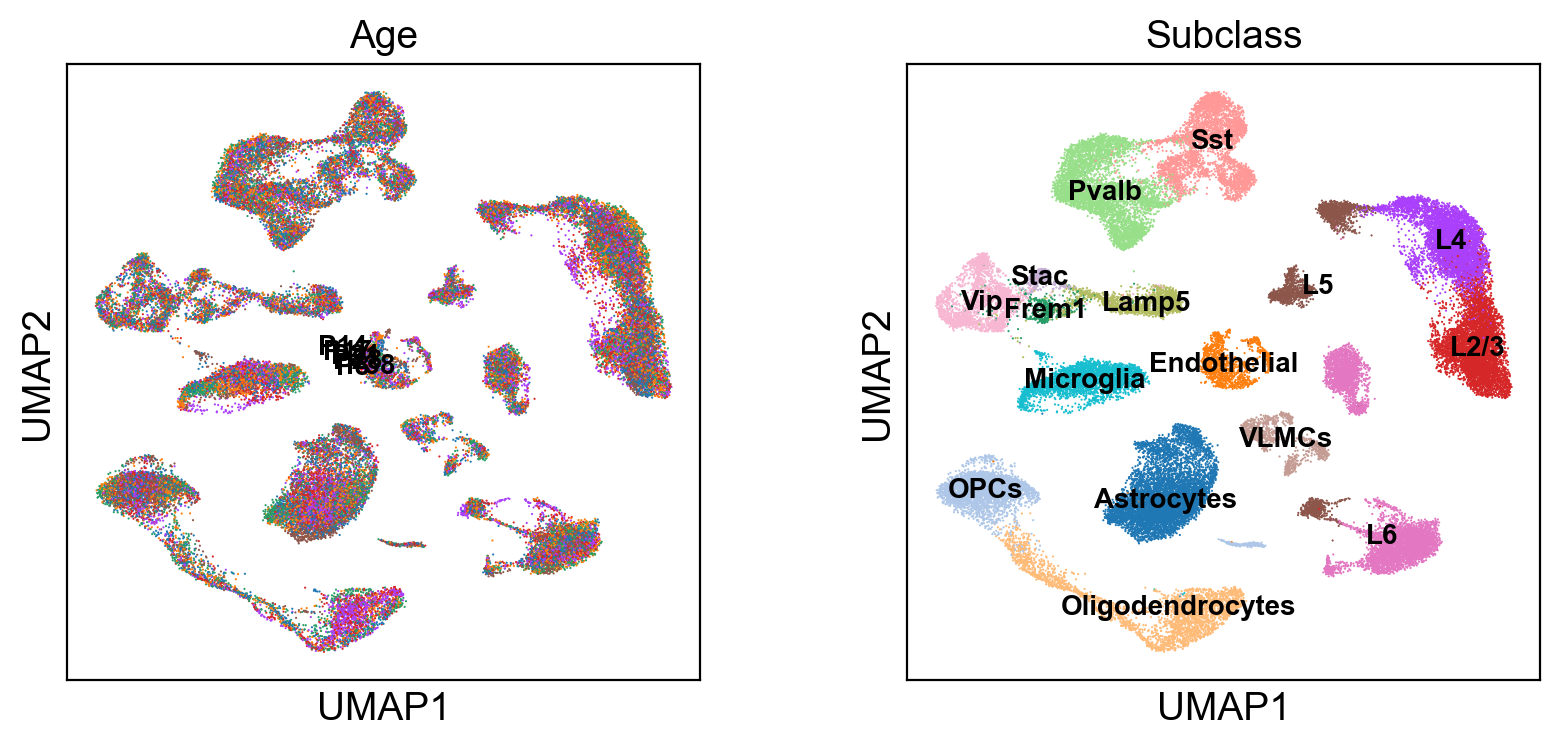

In [30]:
sc.pl.umap(shuffle(adata), color=['Age','Subclass'], legend_loc='on data', legend_fontsize=10)

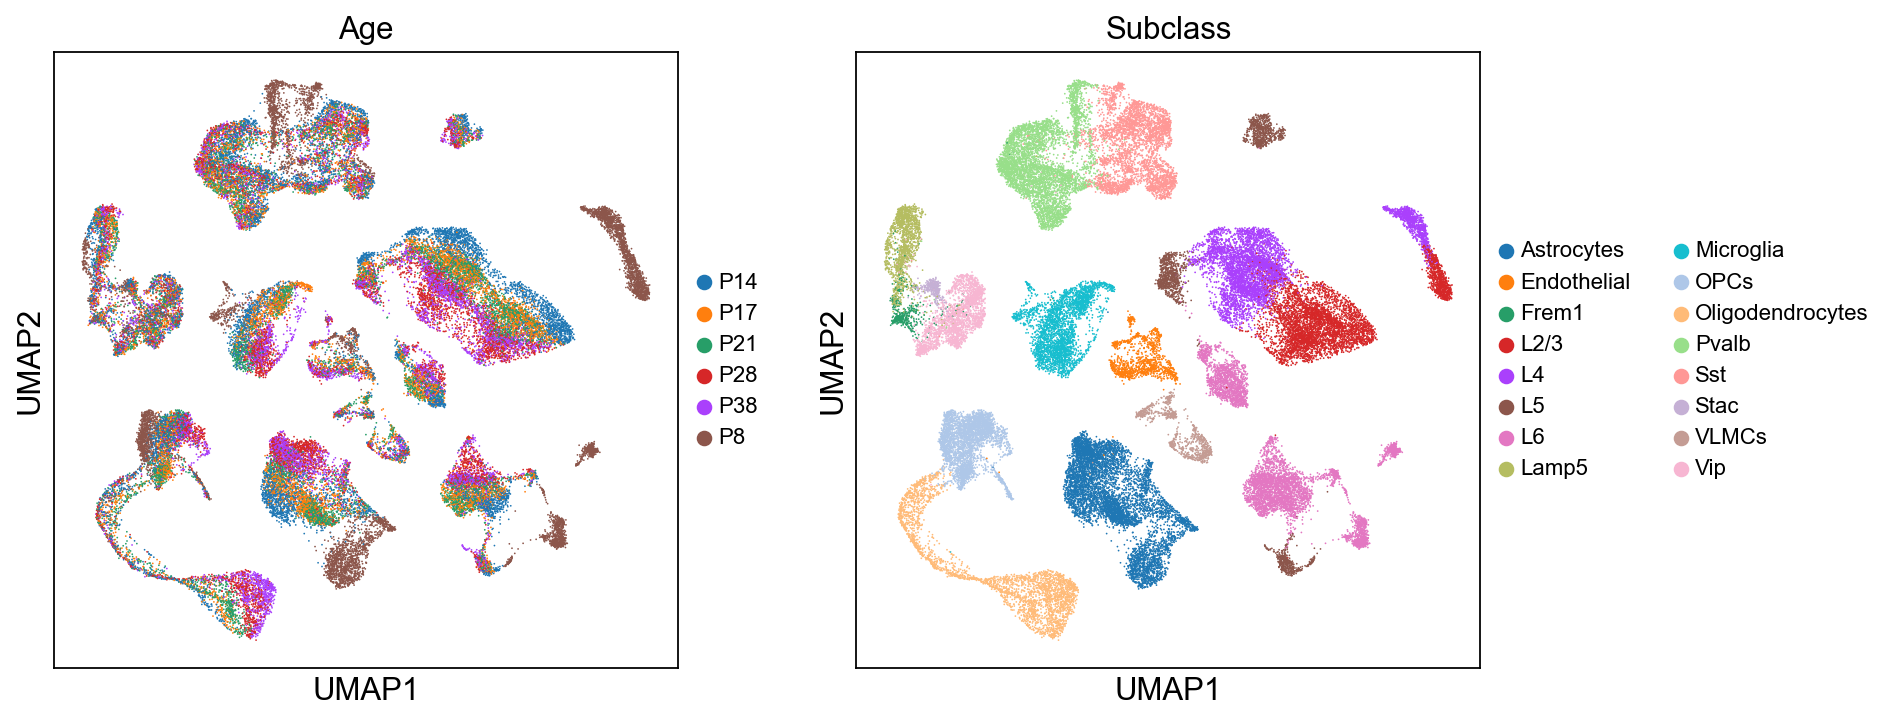

In [86]:
sc.pl.umap(shuffle(adata), color=['Age','Subclass'], legend_fontsize=10)

In [52]:
adata = adata[adata.obs['Class_broad']!='Ambiguous',:]
adata = adata[adata.obs['Class_broad']!='nan',:]

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [54]:
adata.obs.Class_broad.values.categories

Index(['Astrocytes', 'Endothelial', 'Excitatory', 'Inhibitory', 'Microglia',
       'OPCs', 'Oligodendrocytes', 'VLMCs'],
      dtype='object')

In [61]:
Class = []
for i in range(adata.shape[0]):
    if(adata.obs['Class_broad'][i] in ['Astrocytes', 'Endothelial','Microglia',
       'OPCs', 'Oligodendrocytes', 'VLMCs']):
        Class.append('Glia')
        
    else: Class.append(adata.obs['Class_broad'][i])

adata.obs['Class'] = pd.Categorical(Class)

Trying to set attribute `.obs` of view, copying.


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


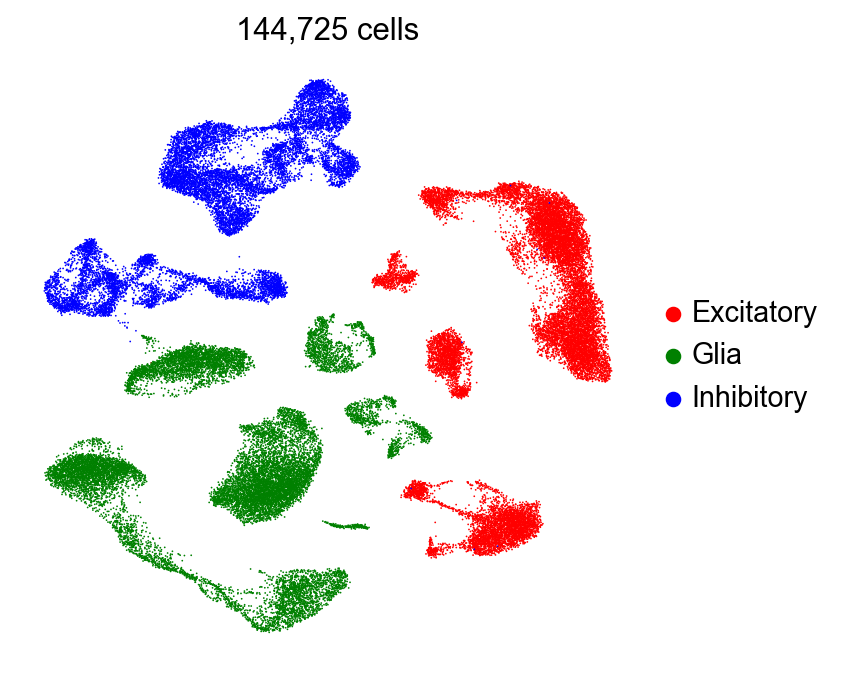

In [82]:
sc.set_figure_params(figsize=(5,5))
sc.pl.umap(adata, color=['Class'], 
           title='144,725 cells', frameon=False, palette=['r', 'g', 'b'])

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.uns` of view, copying.


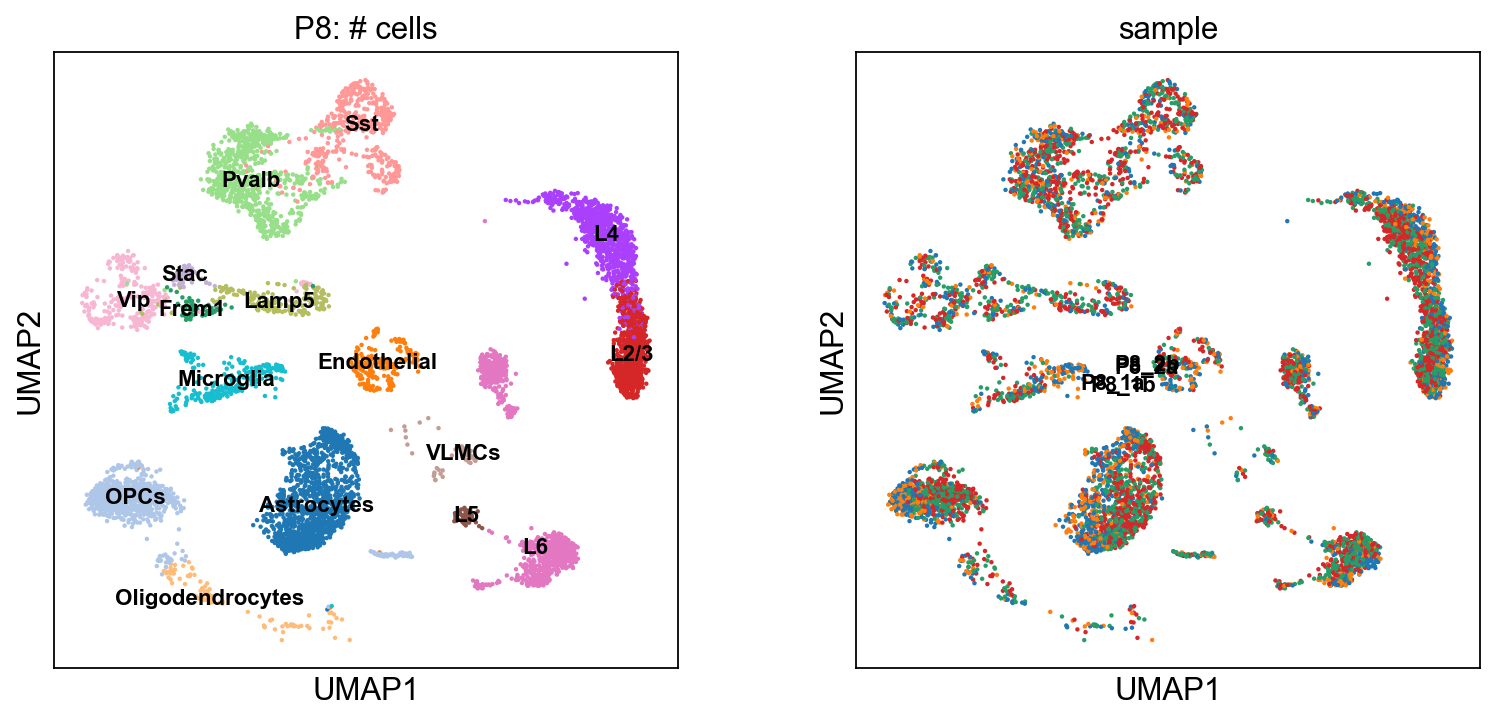

In [79]:
sc.pl.umap(adata[adata.obs.Age=='P8'], color=['Subclass', 'sample'], legend_fontsize=10,
          title='P8: # cells', legend_loc='on data')

In [126]:
P8 = adata[adata.obs.Age=='P17']

P8.X = P8.raw.X.A

sc.pp.highly_variable_genes(P8, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

sc.pp.scale(P8, max_value=10) #scale
sc.tl.pca(P8, svd_solver='arpack') #run PCA

#Z = harmonize(P8.obsm['X_pca'], P8.obs, batch_key = 'sample')
#P8.obsm['X_harmony'] = Z

sc.pp.neighbors(P8, n_neighbors=25)

#sc.tl.leiden(P8)
sc.tl.umap(P8)

/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
Trying to set attribute `.uns` of view, copying.
/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/numba/compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../opt/anaconda3/lib/python3.7/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


/Users/salwanbutrus/opt/anaconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


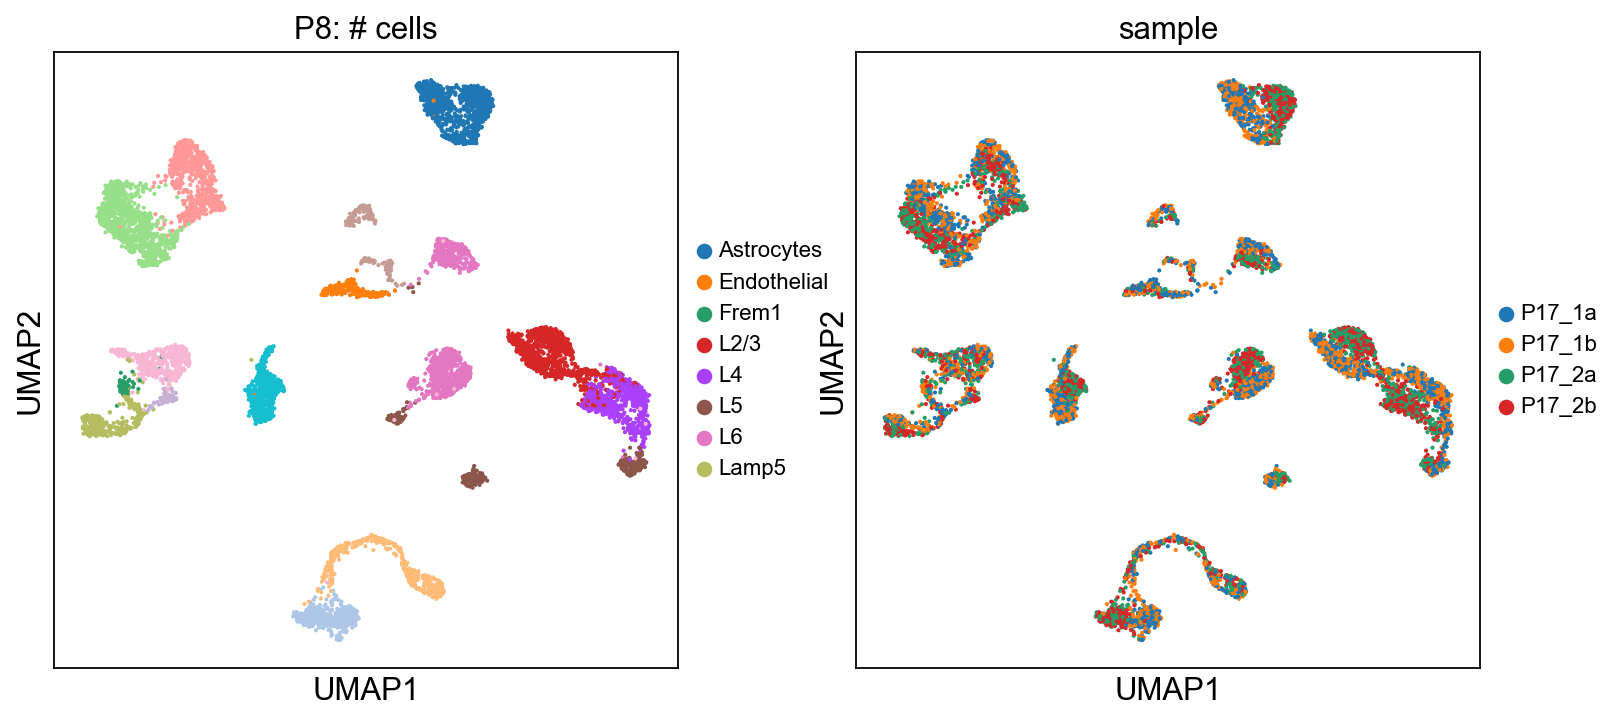

In [127]:
sc.pl.umap(P8, color=['Subclass', 'sample'], legend_fontsize=10,
          title='P8: # cells',)

# Savio

## Center plot

In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
#from harmony import harmonize
from sklearn.metrics.cluster import adjusted_rand_score
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.utils import shuffle
from anndata import AnnData
from sklearn.cluster import KMeans
from typing import Union, Optional, Tuple, Collection, Sequence, Iterable
from scipy.stats import hypergeom
import sklearn.preprocessing
import seaborn as sn

sc.set_figure_params(dpi_save=200)


adata = sc.read_h5ad('gluta_gaba_glia_combined.h5ad')

adata.X = adata.raw.X

sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

sc.pp.scale(adata, max_value=10) #scale
sc.tl.pca(adata, svd_solver='arpack') #run PCA

#Z = harmonize(adata.obsm['X_pca'], adata.obs, batch_key = 'Age')
#adata.obsm['X_harmony'] = Z

sc.pp.neighbors(adata, n_neighbors=25)

#sc.tl.leiden(adata)
sc.tl.umap(adata)

Class = []
for i in range(adata.shape[0]):
    if(adata.obs['Class_broad'][i] in ['Astrocytes', 'Endothelial','Microglia',
       'OPCs', 'Oligodendrocytes', 'VLMCs']):
        Class.append('Glia')
        
    else: Class.append(adata.obs['Class_broad'][i])

adata.obs['Class'] = pd.Categorical(Class)




sc.pl.umap(adata, color=['Class'], 
           title='144,725 cells', frameon=False, palette=['r', 'g', 'b'], save='_1Ecenter_class.pdf')

sc.pl.umap(adata, color=['Age'], 
           title='144,725 cells', frameon=False, save='_1Ecenter_age.pdf')

## By age

```
P14    31,774
P17    29,153
P21    26,123
P28    23,930
P38    16,997
P8     16,748
```

In [ ]:
from time import time
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import scanpy as sc
import pandas as pd
#from harmony import harmonize
from sklearn.metrics.cluster import adjusted_rand_score
import random
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_score
from sklearn.utils import shuffle
from anndata import AnnData
from sklearn.cluster import KMeans
from typing import Union, Optional, Tuple, Collection, Sequence, Iterable
from scipy.stats import hypergeom
import sklearn.preprocessing
import seaborn as sn

sc.set_figure_params(dpi_save=200)


adata = sc.read_h5ad('gluta_gaba_glia_combined.h5ad')


P8 = adata[adata.obs.Age=='P8']

P8.X = P8.raw.X.A

sc.pp.highly_variable_genes(P8, min_mean=0.0125, max_mean=3, min_disp=0.5) #HVGs

sc.pp.scale(P8, max_value=10) #scale
sc.tl.pca(P8, svd_solver='arpack') #run PCA

#Z = harmonize(P8.obsm['X_pca'], P8.obs, batch_key = 'sample')
#P8.obsm['X_harmony'] = Z

sc.pp.neighbors(P8, n_neighbors=25)

#sc.tl.leiden(P8)
sc.tl.umap(P8)


sc.pl.umap(P8, color=['Subclass'], 
           title='P8: 16,748 cells', frameon=False, 
            palette=['#a7ffa7', '#00f600', '#00ce00', '#00a700', '#008000', '#004500',
                     '#d7d7ff', '#9c9cff', '#4e4eff', '#0000ff', '#000089', '#00004e',
                     '#ffd8d8',  '#ff8989', '#ff6262', '#ff1414',], save='_1E_P8.pdf')